# Законы распределения дискретных случайных величин


## Тема
Теория вероятностей: Дискретные случайные величины


## Описание
В этом ноутбуке рассматриваются примеры дискретных случайных величин, распределённых по разным законам: биномиальному, Пуассона, геометрическому и гипергеометрическому. Для каждой величины составляется закон распределения, вычисляются математическое ожидание, дисперсия, среднее квадратическое отклонение и мода, а также строится многоугольник распределения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, geom, hypergeom

## 1. Биномиальное распределение
### Пример задачи
Пусть X — число клиентов, которые купят товар A в магазине из 10 клиентов, каждый с вероятностью покупки 0.3. Тогда X распределена по биномиальному закону:
$$X \sim Bi(n=10, p=0.3)$$


### Аналитический расчет
Закон распределения:
$$P(X=k) = \binom{10}{k} 0.3^k 0.7^{10-k},\ k=0,1,...,10$$
Математическое ожидание:
$$M[X] = np = 3$$
Дисперсия:
$$D[X] = np(1-p) = 2.1$$
Среднее квадратическое отклонение:
$$\sigma[X] = \sqrt{D[X]} \approx 1.449$$
Мода: $\lfloor (n+1)p \rfloor = 3$
Медиана: 3 или 4

X: [ 0  1  2  3  4  5  6  7  8  9 10]
P(X): [2.82475249e-02 1.21060821e-01 2.33474441e-01 2.66827932e-01
 2.00120949e-01 1.02919345e-01 3.67569090e-02 9.00169200e-03
 1.44670050e-03 1.37781000e-04 5.90490000e-06]
M[X]=3.0, D[X]=2.1, sigma[X]=1.449137674618944, mode=3, median=3.0


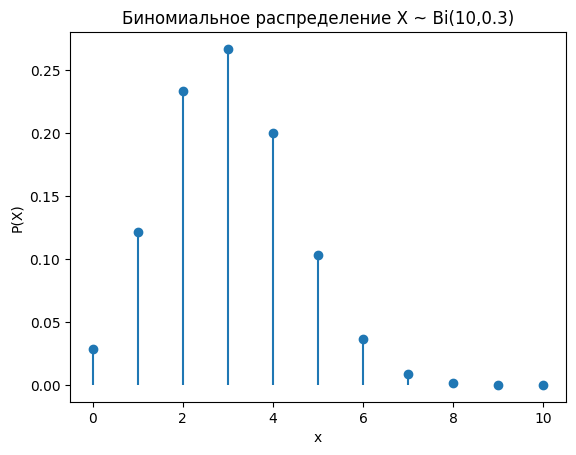

In [8]:
n, p = 10, 0.3
x = np.arange(0, n+1)
pmf_binom = binom.pmf(x, n, p)


mean_binom = binom.mean(n, p)
var_binom = binom.var(n, p)
std_binom = binom.std(n, p)
mode_binom = x[np.argmax(pmf_binom)]
median_binom = binom.median(n, p)


print(f"X: {x}")
print(f"P(X): {pmf_binom}")
print(f"M[X]={mean_binom}, D[X]={var_binom}, sigma[X]={std_binom}, mode={mode_binom}, median={median_binom}")


plt.stem(x, pmf_binom, basefmt=' ')
plt.xlabel('x')
plt.ylabel('P(X)')
plt.title('Биномиальное распределение X ~ Bi(10,0.3)')
plt.show()

Пусть Y — число клиентов, пришедших в кафе за один час, если среднее число клиентов равно 4. Тогда:
$$Y \sim Poisson(\lambda=4)$$


### Аналитический расчет
Закон распределения:
$$P(Y=k) = \frac{4^k e^{-4}}{k!},\ k=0,1,...$$
Математическое ожидание:
$$M[Y] = \lambda = 4$$
Дисперсия:
$$D[Y] = \lambda = 4$$
СКО:
$$\sigma[Y] = 2$$
Мода: 4
Медиана: около 4

Y: [ 0  1  2  3  4  5  6  7  8  9 10]
P(Y): [0.01831564 0.07326256 0.14652511 0.19536681 0.19536681 0.15629345
 0.10419563 0.05954036 0.02977018 0.01323119 0.00529248]
M[Y]=4.0, D[Y]=4.0, sigma[Y]=2.0, mode=3, median=4.0


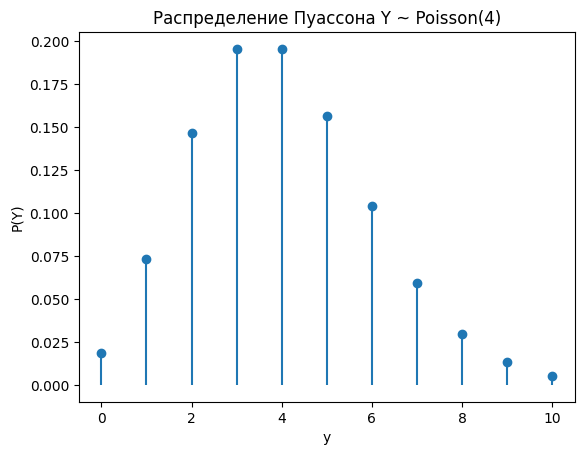

In [9]:
lam = 4
y = np.arange(0, 11)
pmf_poisson = poisson.pmf(y, lam)


mean_poisson = poisson.mean(lam)
var_poisson = poisson.var(lam)
std_poisson = poisson.std(lam)
mode_poisson = y[np.argmax(pmf_poisson)]
median_poisson = poisson.median(lam)


print(f"Y: {y}")
print(f"P(Y): {pmf_poisson}")
print(f"M[Y]={mean_poisson}, D[Y]={var_poisson}, sigma[Y]={std_poisson}, mode={mode_poisson}, median={median_poisson}")


plt.stem(y, pmf_poisson, basefmt=' ')
plt.xlabel('y')
plt.ylabel('P(Y)')
plt.title('Распределение Пуассона Y ~ Poisson(4)')
plt.show()

## 3. Геометрическое распределение
### Пример задачи
Пусть Z — число попыток до первой успешной регистрации на сайте, вероятность успешной регистрации p=0.2. Тогда:
$$Z \sim Geom(p=0.2)$$


### Аналитический расчет
Закон распределения:
$$P(Z=k) = (1-p)^{k-1} p,\ k=1,2,...$$
Математическое ожидание:
$$M[Z] = 1/p = 5$$
Дисперсия:
$$D[Z] = (1-p)/p^2 = 20$$
СКО:
$$\sigma[Z] \approx 4.472$$
Мода: 1
Медиана: $\lceil \log(0.5)/\log(1-p) \rceil \approx 4$

Z: [ 1  2  3  4  5  6  7  8  9 10]
P(Z): [0.2        0.16       0.128      0.1024     0.08192    0.065536
 0.0524288  0.04194304 0.03355443 0.02684355]
M[Z]=5.0, D[Z]=20.0, sigma[Z]=4.47213595499958, mode=1, median=4.0


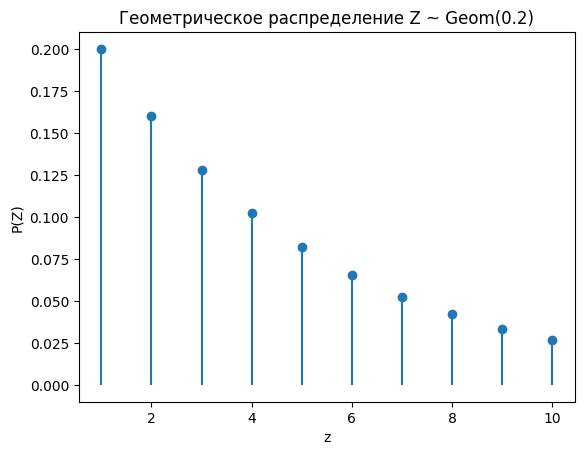

In [10]:
p_geom = 0.2
z = np.arange(1, 11)
pmf_geom = geom.pmf(z, p_geom)


mean_geom = geom.mean(p_geom)
var_geom = geom.var(p_geom)
std_geom = geom.std(p_geom)
mode_geom = 1
median_geom = geom.median(p_geom)


print(f"Z: {z}")
print(f"P(Z): {pmf_geom}")
print(f"M[Z]={mean_geom}, D[Z]={var_geom}, sigma[Z]={std_geom}, mode={mode_geom}, median={median_geom}")


plt.stem(z, pmf_geom, basefmt=' ')
plt.xlabel('z')
plt.ylabel('P(Z)')
plt.title('Геометрическое распределение Z ~ Geom(0.2)')
plt.show()

## 4. Гипергеометрическое распределение
### Пример задачи
Пусть W — число бракованных деталей среди 6 выбранных из партии 20 деталей, где 5 бракованных. Тогда:
$$W \sim Hypergeom(N=20, M=5, n=6)$$


### Аналитический расчет
Закон распределения:
$$P(W=k) = \frac{\binom{5}{k}\binom{15}{6-k}}{\binom{20}{6}},\ k=0,1,...,5$$
Математическое ожидание:
$$M[W] = n \frac{M}{N} = 6 \cdot \frac{5}{20} = 1.5$$
Дисперсия:
$$D[W] = n \frac{M}{N} \frac{N-M}{N} \frac{N-n}{N-1} \approx 1.6579$$
СКО:
$$\sigma[W] \approx 1.288$$
Мода: 1 или 2
Медиана: 1 или 2

W: [0 1 2 3 4 5 6]
P(W): [1.29127967e-01 3.87383901e-01 3.52167183e-01 1.17389061e-01
 1.35448916e-02 3.86996904e-04 0.00000000e+00]
M[W]=1.5, D[W]=0.8289473684210527, sigma[W]=0.910465468000326, mode=1, median=1.0


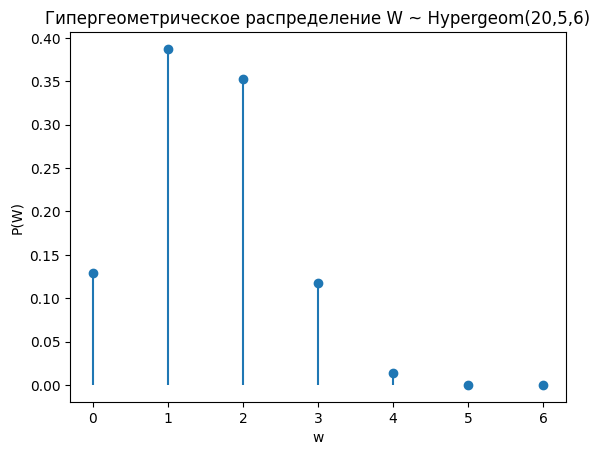

In [11]:
M, n_total, N = 5, 6, 20
w = np.arange(0, n_total+1)
pmf_hypergeom = hypergeom.pmf(w, N, M, n_total)


mean_hypergeom = hypergeom.mean(N, M, n_total)
var_hypergeom = hypergeom.var(N, M, n_total)
std_hypergeom = hypergeom.std(N, M, n_total)
mode_hypergeom = w[np.argmax(pmf_hypergeom)]
median_hypergeom = hypergeom.median(N, M, n_total)


print(f"W: {w}")
print(f"P(W): {pmf_hypergeom}")
print(f"M[W]={mean_hypergeom}, D[W]={var_hypergeom}, sigma[W]={std_hypergeom}, mode={mode_hypergeom}, median={median_hypergeom}")


plt.stem(w, pmf_hypergeom, basefmt=' ')
plt.xlabel('w')
plt.ylabel('P(W)')
plt.title('Гипергеометрическое распределение W ~ Hypergeom(20,5,6)')
plt.show()